# Assignment 1 computer Vision ELG7186[EI]

## Name:Enas Ahmed Fouad Ali

In [ ]:
from ipywidgets import FileUpload
upload = FileUpload()
upload

FileUpload(value={}, description='Upload')

In [ ]:
!pip install fast_ml --quiet
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage
from skimage import io
from skimage.transform import resize
import numpy as np
import pandas as pd
import os
from PIL import Image
import tarfile
from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import itertools


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
#from sklearn.metrics import plot_confusion_matrix

# Image Labelling - Linear Classification

In [ ]:
#Connect to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Open the .tgz File

In [ ]:
file_path = "/content/drive/MyDrive/EnglishImg.tgz"
path_='EnglishImg'
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path=path_)

## Required Function

In [ ]:
def Folders_to_read(directory,folders_list):
    df = pd.DataFrame()
    for folder in folders_list:
        folder_path = os.path.join(directory, folder)

        # Iterate over the images in the folder_path
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(folder_path, filename)

                image = Image.open(image_path)
                resized_image = image.resize((64, 64))
                # Convert the resized image to grayscale
                resized_image = resized_image.convert('L')
                # Get the pixel data of the resized image
                pixels = list(resized_image.getdata())
                # Create a column name for each pixel
                column_names = [f'Pixel_{i}' for i in range(len(pixels))]
                # Create a DataFrame with a single row for the image
                image_df = pd.DataFrame([pixels], columns=column_names)
                # Extract the last two characters from each string and convert them
                converted_numbers = convert_number_to_HexaDecimal(folder[-2:])
                image_df['label']=converted_numbers
                df = df.append(image_df, ignore_index=True)
    return df



In [ ]:
def convert_number_to_HexaDecimal(num):
      num=int(num)-1
      if int(num) >= 0 and int(num) <= 9:
          return int(num)
      elif int(num) > 9:
          if int(num) > 36:
            num=num+6
          return chr(ord('A') + int(num) - 10)

      else:
          return num

Function to display a pie chart for the classed to know if there are imbalanced in the dataset or not

In [ ]:
def plotPieCharts(data_list, data_list_name):
    num_items = len(data_list)

    # Handle the case when there is only one item in the list
    if num_items == 1:
        fig, axes = plt.subplots(1, 1, figsize=(4, 6))
        labels_arraytype = data_list[0]
        class_labels, class_counts = np.unique(labels_arraytype, return_counts=True)

        pastel_palette = sns.color_palette('pastel', n_colors=len(class_labels))
        axes.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=pastel_palette,
                    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
        axes.set_title(data_list_name[0])
    else:
        # Handle the case when there are multiple items in the list
        fig, axes = plt.subplots(1, num_items, figsize=(4 * num_items, 6))
        for i, labels_arraytype in enumerate(data_list):
            class_labels, class_counts = np.unique(labels_arraytype, return_counts=True)

            pastel_palette = sns.color_palette('pastel', n_colors=len(class_labels))
            axes[i].pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=pastel_palette,
                        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
            axes[i].set_title(data_list_name[i])

    plt.tight_layout()
    plt.show()


In [ ]:
def train_valid_test_split(X, y, train_size=0.6, valid_size=0.2, test_size=0.2, random_state=None):
    X=selected_rows[:, :-1]
    total_size = len(X)
    train_end = int(train_size * total_size)
    valid_end = train_end + int(valid_size * total_size)

    if random_state is not None:
        np.random.seed(random_state)
        indices = np.random.permutation(total_size)
        X, y = X[indices], y[indices]

    x_train, y_train = X[:train_end], y[:train_end]
    x_valid, y_valid = X[train_end:valid_end], y[train_end:valid_end]
    x_test, y_test = X[valid_end:], y[valid_end:]

    return x_train, y_train, x_valid, y_valid, x_test, y_test



In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [ ]:
def calculation_From_confusion_matrix(y_Actual,y_pred,y_scores):
  y_Actual = y_Actual.astype(int)
  y_pred = y_pred.astype(int)

  cm = confusion_matrix(y_Actual, y_pred)
  TruePositive = np.sum((y_Actual == 1) & (y_pred == 1))
  TrueNegative = np.sum((y_Actual == 0) & (y_pred == 0))
  FalsePositive = np.sum((y_Actual == 0) & (y_pred == 1))
  FalseNegative = np.sum((y_Actual == 1) & (y_pred == 0))

  Accuracy = (TruePositive + TrueNegative)/(TruePositive + TrueNegative + FalsePositive + FalseNegative)
  print(f"Accuracy: {Accuracy:4.2f} %")

  precision = TruePositive / (TruePositive + FalsePositive)
  print(f"precision: {precision:4.2f}")

  recall = TruePositive / (TruePositive + FalseNegative)
  print(f"recall: {recall:4.2f}")


  plot_confusion_matrix(cm, classes=['Class 1', 'Class 2'])
  #draw_roc_curve(y_Actual, y_scores)
  return Accuracy,precision,recall,f1_score

In [ ]:
def draw_roc_curve(y_Actual, y_scores):

    fpr, tpr, thresholds = roc_curve(y_Actual, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
def calculation_From_confusion_matrix_multiclass(y_Actual,y_pred,y_scores):
  y_Actual = y_Actual.astype(int)
  y_pred = y_pred.astype(int)

  cm = confusion_matrix(y_Actual, y_pred)
  TruePositive = np.sum((y_Actual == 1) & (y_pred == 1))
  TrueNegative = np.sum((y_Actual == 0) & (y_pred == 0))
  FalsePositive = np.sum((y_Actual == 0) & (y_pred == 1))
  FalseNegative = np.sum((y_Actual == 1) & (y_pred == 0))

  Accuracy = (TruePositive + TrueNegative)/(TruePositive + TrueNegative + FalsePositive + FalseNegative)
  print(f"Accuracy: {Accuracy:4.2f} %")

  plot_confusion_matrix(cm, classes=['4', 'A', 'u', 'H'])
  return Accuracy

## 1.1 Getting Started

In [ ]:
directory = '/content/EnglishImg/English/Img/GoodImg/Bmp'
folders_to_read = ['Sample005','Sample011','Sample057','Sample018']

**Image Preprocessing**

In [ ]:
df=Folders_to_read(directory,folders_to_read)
df

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_4087,Pixel_4088,Pixel_4089,Pixel_4090,Pixel_4091,Pixel_4092,Pixel_4093,Pixel_4094,Pixel_4095,label
0,152,154,154,155,154,153,153,154,156,155,...,173,172,172,173,172,171,172,173,174,4
1,193,193,192,191,189,191,193,194,193,192,...,64,55,64,89,125,157,171,167,156,4
2,60,63,63,62,61,62,62,60,59,63,...,91,62,76,71,66,67,68,66,65,4
3,62,62,63,63,60,61,63,63,63,63,...,66,67,66,64,63,63,64,64,64,4
4,56,56,53,56,56,59,60,62,63,67,...,51,50,49,53,52,51,54,52,50,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,31,37,43,46,39,30,29,30,30,30,...,42,43,41,38,39,38,38,38,37,H
835,146,145,144,146,146,146,149,150,148,148,...,132,133,135,135,131,132,135,129,133,H
836,72,71,71,65,71,73,71,68,66,74,...,60,64,65,70,63,66,62,67,64,H
837,64,64,59,52,77,110,132,153,173,179,...,88,53,56,52,50,56,55,56,56,H


In [ ]:
# convert dataframe to numpy array
df_array = df.to_numpy()
df_array

array([[152, 154, 154, ..., 173, 174, 4],
       [193, 193, 192, ..., 167, 156, 4],
       [60, 63, 63, ..., 66, 65, 4],
       ...,
       [72, 71, 71, ..., 67, 64, 'H'],
       [64, 64, 59, ..., 56, 56, 'H'],
       [47, 47, 47, ..., 46, 46, 'H']], dtype=object)

In [ ]:
labels = df_array[:, -1]
labels

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', '

## 1.2 Binary Classifiers

use LabelEncoder to  transform categorical labels (class labels) in a NumPy array into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
#convert 4 to string because encoders cannot take str and int in the same time
df_array[:, -1] = df_array[:, -1].astype(str)
labels = df_array[:, -1]
encoded_labels = label_encoder.fit_transform(labels)
df_array[:, -1] = encoded_labels


select rows that belongs to '4' or 'A' classes

In [ ]:
selected_rows = df_array[(df_array[:, -1] == 0) | (df_array[:, -1] == 1)]
label_column = selected_rows[:, -1]

In [ ]:
selected_rows.shape

(605, 4097)

 visualize the distribution of class labels in a dataset before any splitting ,1 refers to 'A' class and 0 for '4' class
 and we notice tha we have imbalanced class distributions

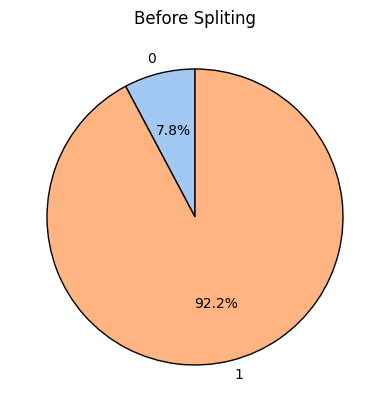

In [ ]:
data_list = [label_column]
data_list_name = ['Before Spliting']
plotPieCharts(data_list,data_list_name)

So I use Stratified split because I have imbalanced class distribution, the primary reason for using stratified splitting is to ensure that the resulting train and test sets maintain a similar class distribution to the original dataset.

In [ ]:
x_train_valid, x_test_stratified, y_train_valid, y_test_stratified = train_test_split(selected_rows, label_column, test_size=0.2, stratify=label_column, random_state=42)

x_train_stratified, x_valid_stratified, y_train_stratified, y_valid_stratified = train_test_split(x_train_valid, y_train_valid, test_size=0.25, stratify=y_train_valid, random_state=42)

In [ ]:
print(x_train_stratified.shape,y_train_stratified.shape)
print(x_valid_stratified.shape,y_valid_stratified.shape)
print(x_test_stratified.shape,y_test_stratified.shape)

(363, 4097) (363,)
(121, 4097) (121,)
(121, 4097) (121,)


In [ ]:
print(f"train_size: {len(x_train_stratified)}")
print(f"valid_size: {len(x_valid_stratified)}")
print(f"train_size: {len(x_test_stratified)}")

train_size: 363
valid_size: 121
train_size: 121


as we see here we maintain a similar class distribution to the original dataset

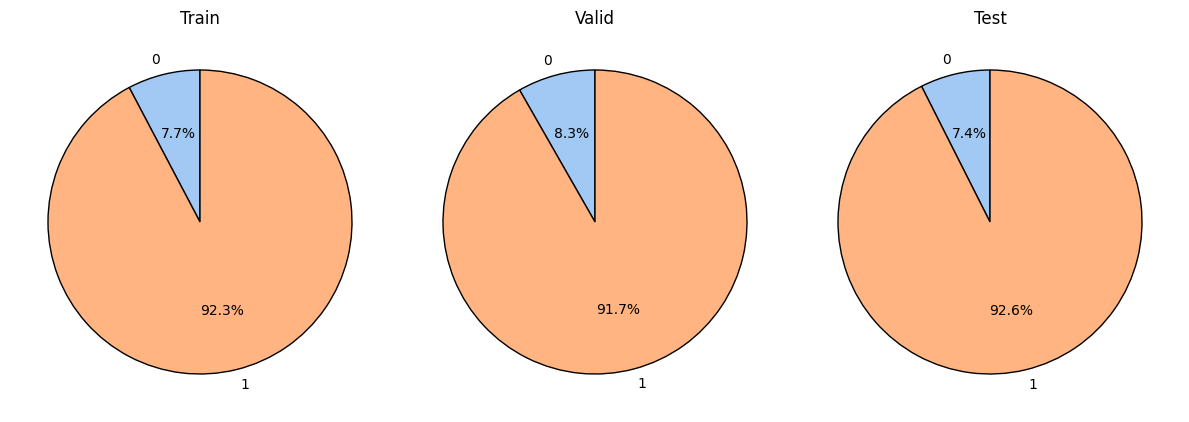

In [ ]:
data_list = [y_train_stratified, y_valid_stratified,y_test_stratified]
data_list_name = ['Train', 'Valid','Test']
plotPieCharts(data_list,data_list_name)


**Random Selection:** This approach is not suitable when we have an imbalanced dataset where each class has not an equal number of samples.                     I just try this approach to make sure

In [ ]:
# Split the dataset into train, validation, and test sets
x_train_random, y_train_random, x_valid_random, y_valid_random, x_test_random, y_test_random = train_valid_test_split(
    selected_rows, label_column, train_size=0.6, valid_size=0.2, test_size=0.2)


In [ ]:
print(x_train_random.shape,y_train_random.shape)
print(x_valid_random.shape,y_valid_random.shape)
print(x_test_random.shape,y_test_random.shape)

(363, 4096) (363,)
(121, 4096) (121,)
(121, 4096) (121,)


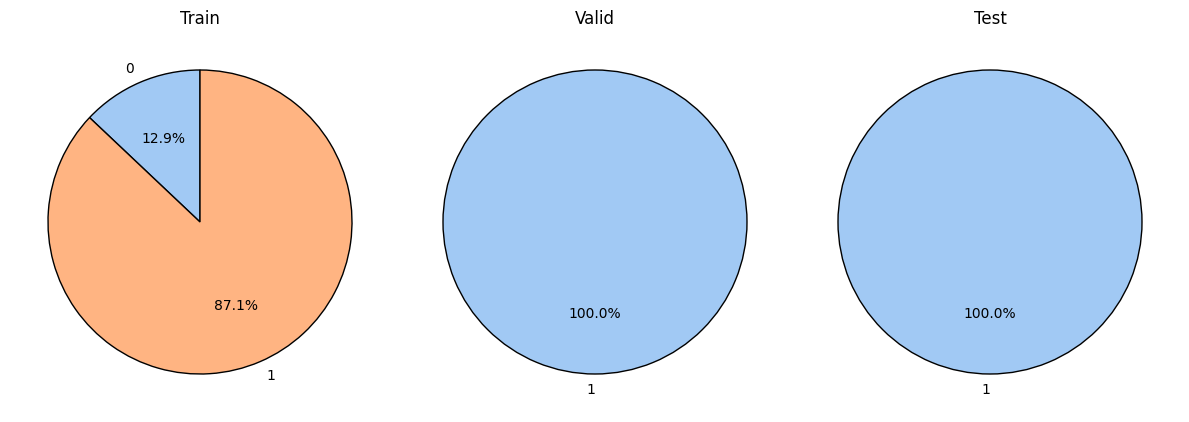

In [ ]:
data_list = [y_train_random, y_valid_random,y_test_random]
data_list_name = ['Train', 'Valid','Test']
plotPieCharts(data_list,data_list_name)


### Apply Binary Logistic Regression Using Stratified Sampling

In [ ]:
y_train_stratified = y_train_stratified.astype(int)
bin_clf_stratified = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
bin_clf_stratified.fit(x_train_stratified, y_train_stratified)

LogisticRegression(max_iter=10, solver='liblinear', tol=0.1)

Calculate Accuracy For Traing Set

Accuracy: 1.00 %
precision: 1.00
recall: 1.00


(1.0,
 1.0,
 1.0,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

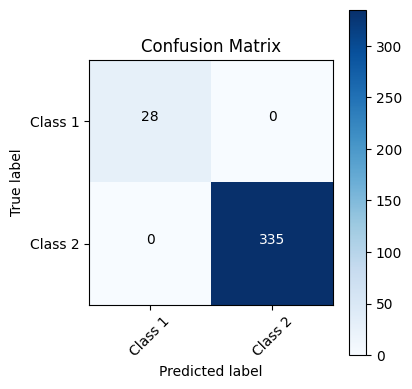

In [ ]:
y_pred= bin_clf_stratified.predict(x_train_stratified)
y_scores = bin_clf_stratified.predict_proba(x_train_stratified)[:, 1]
calculation_From_confusion_matrix(y_train_stratified,y_pred,y_scores)

Calculate Accuracy For Testing Set

from the result we notice that

Accuracy: 0.90 %
precision: 0.92
recall: 0.97


(0.9008264462809917,
 0.923728813559322,
 0.9732142857142857,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

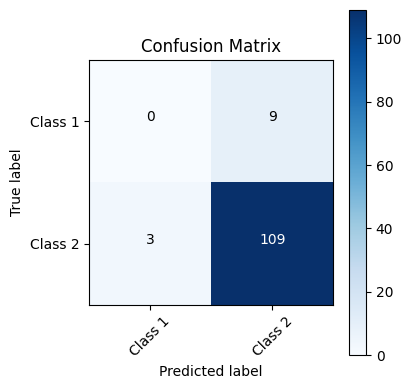

In [ ]:
y_pred= bin_clf_stratified.predict(x_test_stratified)
y_scores = bin_clf_stratified.predict_proba(x_test_stratified)[:, 1]
calculation_From_confusion_matrix(y_test_stratified,y_pred,y_scores)

### Apply Logistic Regression Using Random Sampling

In [ ]:
y_train_random = y_train_random.astype(int)
bin_clf_random = LogisticRegression(max_iter=10, tol=0.1, solver='liblinear')
bin_clf_random.fit(x_train_random, y_train_random)

LogisticRegression(max_iter=10, solver='liblinear', tol=0.1)

Calculate Accuracy For Traing Set

Accuracy: 0.99 %
precision: 0.99
recall: 1.00


(0.9917355371900827,
 0.9936908517350158,
 0.9968354430379747,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

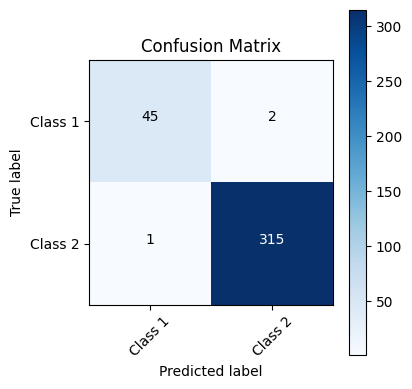

In [ ]:
y_pred= bin_clf_random.predict(x_train_random)
y_scores = bin_clf_random.predict_proba(x_train_random)[:, 1]
calculation_From_confusion_matrix(y_train_random,y_pred,y_scores)

Calculate Accuracy For Testing Set

Accuracy: 0.95 %
precision: 1.00
recall: 0.95


(0.9504132231404959,
 1.0,
 0.9504132231404959,
 <function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

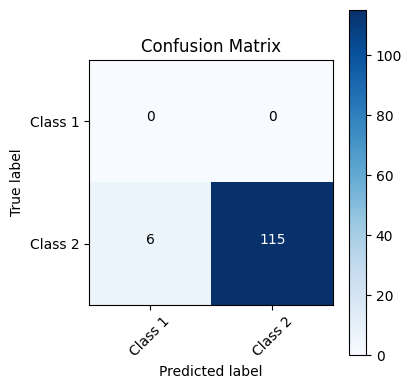

In [ ]:
y_pred= bin_clf_random.predict(x_test_random)
y_scores = bin_clf_random.predict_proba(x_test_random)[:, 1]
calculation_From_confusion_matrix(y_test_random,y_pred,y_scores)

**Explain Result**

Stratified Sampling Without Shuffling: when using stratified sampling without shuffling, the class balance is maintained in both the training and testing sets. This approach ensures that each class is represented proportionally in both sets, leading to more consistent and reliable model performance metrics. The model trained with stratified sampling is likely to generalize better to unseen data, resulting in more stable and consistent results. Therefore, stratified sampling provides a more robust and trustworthy evaluation of model performance, especially in scenarios with imbalanced classes.

## 1.3 Multiclass Classifier

select rows that belongs to all classes

In [ ]:
selected_rows = df_array[(df_array[:, -1] == 0) | (df_array[:, -1] == 1)|(df_array[:, -1] == 2) | (df_array[:, -1] == 3)]
label_column = selected_rows[:, -1]

In [ ]:
selected_rows.shape

(839, 4097)

 visualize the distribution of class labels in a dataset before any splitting ,1 refers to 'A' class and 0 for '4' class
 and we notice tha we have imbalanced class distributions

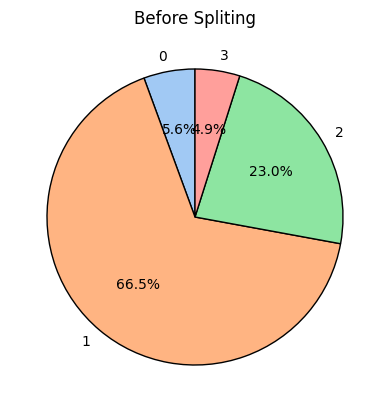

In [ ]:
data_list = [label_column]
data_list_name = ['Before Spliting']
plotPieCharts(data_list,data_list_name)

So I use Stratified split because I have imbalanced class distribution, the primary reason for using stratified splitting is to ensure that the resulting train and test sets maintain a similar class distribution to the original dataset.

In [ ]:
x_train_valid, x_test_stratified, y_train_valid, y_test_stratified = train_test_split(selected_rows, label_column, test_size=0.2, stratify=label_column, random_state=42)

x_train_stratified, x_valid_stratified, y_train_stratified, y_valid_stratified = train_test_split(x_train_valid, y_train_valid, test_size=0.25, stratify=y_train_valid, random_state=42)

In [ ]:
print(x_train_stratified.shape,y_train_stratified.shape)
print(x_valid_stratified.shape,y_valid_stratified.shape)
print(x_test_stratified.shape,y_test_stratified.shape)

(503, 4097) (503,)
(168, 4097) (168,)
(168, 4097) (168,)


In [ ]:
print(f"train_size: {len(x_train_stratified)}")
print(f"valid_size: {len(x_valid_stratified)}")
print(f"train_size: {len(x_test_stratified)}")

train_size: 503
valid_size: 168
train_size: 168


as we see here we maintain a similar class distribution to the original dataset

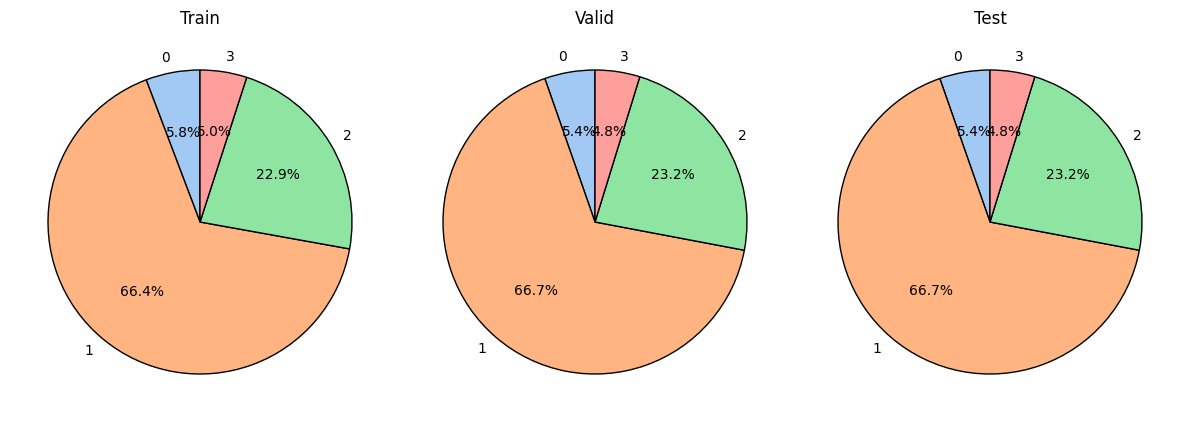

In [ ]:
data_list = [y_train_stratified, y_valid_stratified,y_test_stratified]
data_list_name = ['Train', 'Valid','Test']
plotPieCharts(data_list,data_list_name)


**Random Selection:** This approach is not suitable when we have an imbalanced dataset where each class has not an equal number of samples.                     I just try this approach to make sure

In [ ]:
# Split the dataset into train, validation, and test sets
x_train_random, y_train_random, x_valid_random, y_valid_random, x_test_random, y_test_random = train_valid_test_split(
    selected_rows, label_column, train_size=0.6, valid_size=0.2, test_size=0.2)


In [ ]:
print(x_train_random.shape,y_train_random.shape)
print(x_valid_random.shape,y_valid_random.shape)
print(x_test_random.shape,y_test_random.shape)

(503, 4096) (503,)
(167, 4096) (167,)
(169, 4096) (169,)


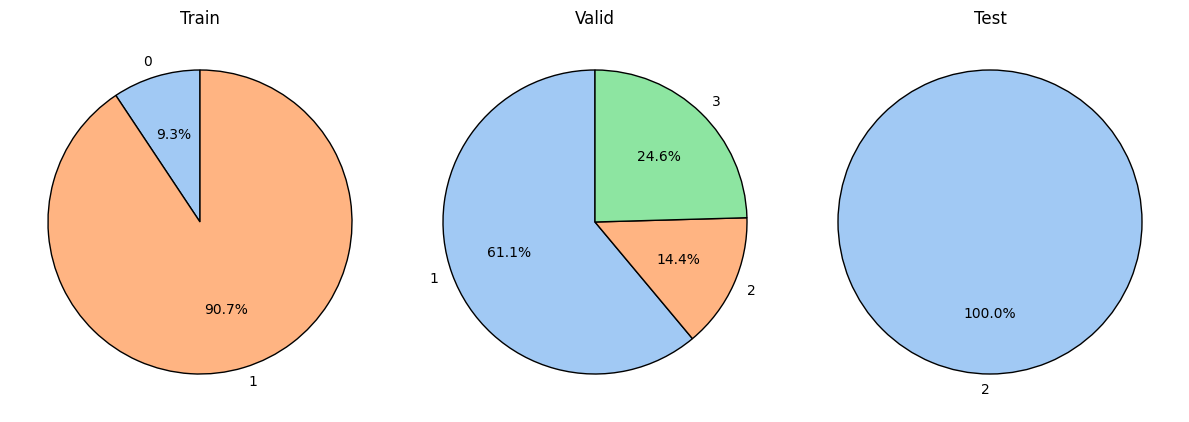

In [ ]:
data_list = [y_train_random, y_valid_random,y_test_random]
data_list_name = ['Train', 'Valid','Test']
plotPieCharts(data_list,data_list_name)


Apply Multiclass Logistic Regression Using Stratified Sampling

In [ ]:
bin_clf_multiclass_stratified = LogisticRegression(multi_class='ovr')
label_encoder = LabelEncoder()
y_train_stratified = label_encoder.fit_transform(y_train_stratified)
y_test_stratified = label_encoder.fit_transform(y_test_stratified)
bin_clf_multiclass_stratified.fit(x_train_stratified, y_train_stratified)

LogisticRegression(multi_class='ovr')

Calculate Accuracy For Traing Set

Accuracy: 1.00 %


1.0

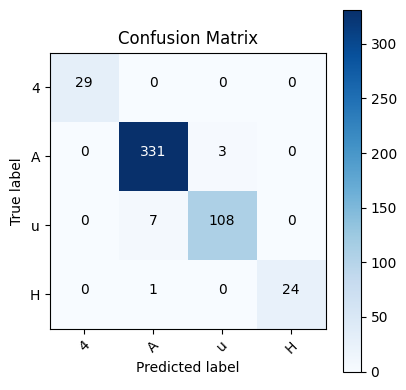

In [ ]:
y_pred= bin_clf_multiclass_stratified.predict(x_train_stratified)
y_scores = bin_clf_multiclass_stratified.predict_proba(x_train_stratified)[:, 1]
calculation_From_confusion_matrix_multiclass(y_train_stratified,y_pred,y_scores)

In [ ]:
from sklearn.metrics import recall_score

# Step 1: Predict class probabilities for each sample in the test set
y_probabilities = bin_clf_multiclass_stratified.predict_proba(x_train_stratified)

recall_values = []
from sklearn.metrics import confusion_matrix

# Initialize lists to store metrics for each class
precisions = []
recalls = []
f1_scores = []

# Step 1: Calculate metrics for each class versus all others
for class_idx, class_label in enumerate(bin_clf_multiclass_stratified.classes_):
    # Create a binary label vector for the current class (1) and all other classes (0)
    y_true_binary = (y_train_stratified == class_label).astype(int)

    # Get the predicted probabilities for the current class
    y_probabilities_class = y_probabilities[:, class_idx]

    # Use a threshold (e.g., 0.5) to convert probabilities to binary predictions
    y_pred_binary = (y_probabilities_class >= 0.5).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    TruePositive = cm[1, 1]
    TrueNegative = cm[0, 0]
    FalsePositive = cm[0, 1]
    FalseNegative = cm[1, 0]


    # Calculate precision
    precision = TruePositive / (TruePositive + FalsePositive)
    precisions.append(precision)

    # Calculate recall
    recall = TruePositive / (TruePositive + FalseNegative)
    recalls.append(recall)


    # Print metrics for the current class
    print(f'Class {class_label}:')
    print(f'Precision = {precision:.2f}')
    print(f'Recall = {recall:.2f}')
    print()

# Step 2: Calculate the averages or any other metric of interest
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
# Calculate F1 score
f1_score = 2 * (average_precision * average_recall) / (average_precision + average_recall)
f1_scores.append(f1_score)

# Print the averages or other metrics of interest
print(f'Average Precision = {average_precision:.2f}')
print(f'Average Recall = {average_recall:.2f}')
print(f'F1 Score = {f1_score:.2f}')


Class 0:
Precision = 1.00
Recall = 1.00

Class 1:
Precision = 0.98
Recall = 0.99

Class 2:
Precision = 0.97
Recall = 0.94

Class 3:
Precision = 1.00
Recall = 0.96

Average Precision = 0.99
Average Recall = 0.97
F1 Score = 0.98


Calculate Accuracy For Testing Set

Accuracy: 0.94 %


0.9411764705882353

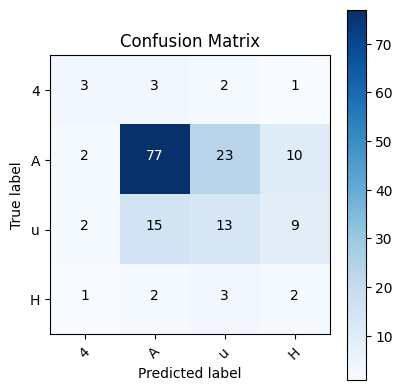

In [ ]:
y_pred= bin_clf_multiclass_stratified.predict(x_test_stratified)
y_scores = bin_clf_multiclass_stratified.predict_proba(x_test_stratified)[:, 1]
calculation_From_confusion_matrix_multiclass(y_test_stratified,y_pred,y_scores)

In [ ]:
from sklearn.metrics import recall_score

# Step 1: Predict class probabilities for each sample in the test set
y_probabilities = bin_clf_multiclass_stratified.predict_proba(x_test_stratified)

recall_values = []
from sklearn.metrics import confusion_matrix

# Initialize lists to store metrics for each class
precisions = []
recalls = []
f1_scores = []

# Step 1: Calculate metrics for each class versus all others
for class_idx, class_label in enumerate(bin_clf_multiclass_stratified.classes_):
    # Create a binary label vector for the current class (1) and all other classes (0)
    y_true_binary = (y_test_stratified == class_label).astype(int)

    # Get the predicted probabilities for the current class
    y_probabilities_class = y_probabilities[:, class_idx]

    # Use a threshold (e.g., 0.5) to convert probabilities to binary predictions
    y_pred_binary = (y_probabilities_class >= 0.5).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    TruePositive = cm[1, 1]
    TrueNegative = cm[0, 0]
    FalsePositive = cm[0, 1]
    FalseNegative = cm[1, 0]


    # Calculate precision
    precision = TruePositive / (TruePositive + FalsePositive)
    precisions.append(precision)

    # Calculate recall
    recall = TruePositive / (TruePositive + FalseNegative)
    recalls.append(recall)


    # Print metrics for the current class
    print(f'Class {class_label}:')
    print(f'Precision = {precision:.2f}')
    print(f'Recall = {recall:.2f}')
    print()

# Step 2: Calculate the averages or any other metric of interest
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
# Calculate F1 score
f1_score = 2 * (average_precision * average_recall) / (average_precision + average_recall)
f1_scores.append(f1_score)

# Print the averages or other metrics of interest
print(f'Average Precision = {average_precision:.2f}')
print(f'Average Recall = {average_recall:.2f}')
print(f'F1 Score = {f1_score:.2f}')


Class 0:
Precision = 0.38
Recall = 0.33

Class 1:
Precision = 0.79
Recall = 0.68

Class 2:
Precision = 0.33
Recall = 0.33

Class 3:
Precision = 0.11
Recall = 0.25

Average Precision = 0.40
Average Recall = 0.40
F1 Score = 0.40


**Class 0** : This class appears to be challenging for the classifier as both precision and recall are relatively low.                                               
**Class 1** : This class performs relatively well in terms of precision and recall.                        
**Class 2** : this class presents some challenges for the classifier.              
**Class 3** : This class is the most challenging for the classifier based on precision and recall.


<Figure size 640x480 with 0 Axes>

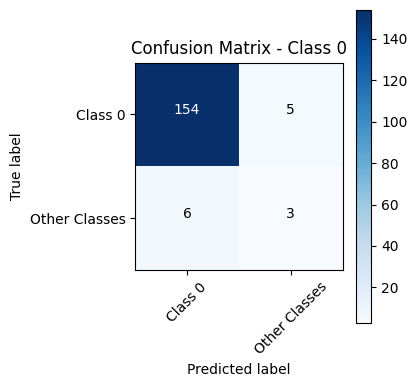

<Figure size 640x480 with 0 Axes>

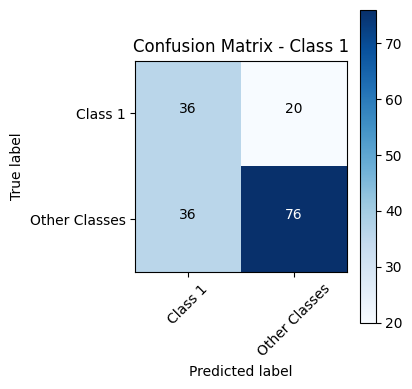

<Figure size 640x480 with 0 Axes>

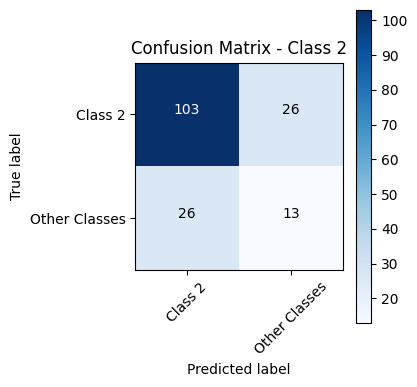

<Figure size 640x480 with 0 Axes>

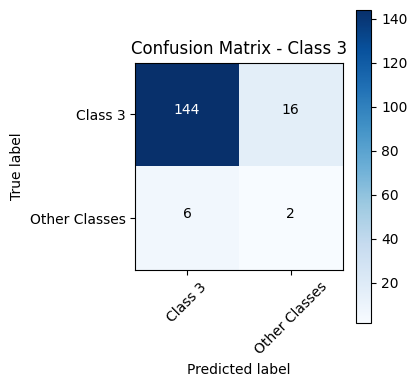

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrices = []  # To store confusion matrices

# Step 1: Calculate metrics for each class versus all others
for class_idx, class_label in enumerate(bin_clf_multiclass_stratified.classes_):
    # Create a binary label vector for the current class (1) and all other classes (0)
    y_true_binary = (y_test_stratified == class_label).astype(int)

    # Get the predicted probabilities for the current class
    y_probabilities_class = y_probabilities[:, class_idx]

    # Use a threshold (e.g., 0.5) to convert probabilities to binary predictions
    y_pred_binary = (y_probabilities_class >= 0.5).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    confusion_matrices.append(cm)

# Draw confusion matrices
for class_idx, class_label in enumerate(bin_clf_multiclass_stratified.classes_):
    plt.figure()
    plot_confusion_matrix(confusion_matrices[class_idx], classes=[f'Class {class_label}', 'Other Classes'])
    plt.title(f'Confusion Matrix - Class {class_label}')
    plt.show()


**Class Imbalance:** The dataset exhibits significant class imbalance, with 'A' having the largest number of samples (558), 'H' having 193 samples, '4' having 47 samples, and 'u' having 41 samples.

**Easier vs. More Difficult Classes:**

**Easier Classes:** The classifier performs very well on the majority classes 'A' and 'H' in both training scenarios. These classes have larger sample sizes, and the model effectively learns to classify them.

**More Difficult Classes**: The minority classes '4' and 'u' are more challenging for the classifier. In both training scenarios, the model struggles to correctly classify these classes, resulting in lower accuracy, average recall, average precision, and F1 scores for these classes.

**Confusion:** The classifier tends to confuse the minority classes ('4' and 'u') with the majority classes ('A' and 'H'). This confusion is evident from the lower average recall and precision scores for these minority classes.

**Impact of Stratified Sampling:** Stratified sampling helps maintain class balance in the training set without significantly impacting overall performance. It results in slightly lower accuracy on the training data but maintains good average recall, average precision, and F1 scores.

**Challenges on Testing Data:** On the testing data, regardless of stratified sampling, the classifier faces difficulties in generalization, especially for the minority classes. This indicates that the model struggles to perform well on unseen data, particularly for underrepresented classes.





